<h1 style="text-align: center;">Reading WAV Files With Python</h1>

---

<h2>Set Up</h2>

We will be using the `scipy` library in order to read our WAV files.
We will be using `matplotlib` along with `numpy` to manipulat and plot the data from the WAV file.  
Make sure you have these libraries installed. You can install them by running the following commands from the terminal:

`python3 -m pip install scipy`  
`python3 -m pip insatll matplotlib`

In [54]:
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

We will use `scipy`'s `read()` function to read in the sample rate and the actuale data of our WAV file.  
The data of our WAV file is in the form of an array of numbers that represent the amplitude of the sound at the moment the sample was taking. The data can be a multi-dementional array if the WAV file contains recordings of multiple audio channels.

In [55]:
(samplerate, data) = wavfile.read('recording0.wav')

We can check how many chanels of sound are present simply by looking at the shape of the WAV file's data:

In [56]:
print(f"Number of channels = {data.shape[1]}")

Number of channels = 2


We can compute the length of the WAV file by dividing the number of samples in the data by the samplerate:

In [57]:
length = data.shape[0] / samplerate
print(f"Length = {length}s")

Length = 5.0s


Next we will plot the WAV file's data in order to be able to see the soundwave.  
We will first create an array that will act as our independent variable which is time. We can do this using the `numpy` function `linspace()`. The first parameter is the starting number, the second is the end number, and the third number is the number of steps in between. We can calculate the number of steps required by multiplying the sample rate by the length of the file:

In [58]:
time = np.linspace(0., length, data.shape[0])

Now all that's left to do is plot the data against our time array:

/home/andrew/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


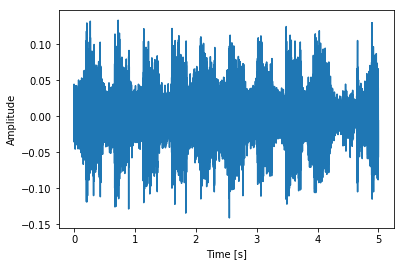

In [59]:
time = np.linspace(0., length, samplerate * length)
plt.plot(time, data[:, 0])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [53]:
import sounddevice as sd
from scipy.io.wavfile import write

# Sampling frequency
freq = 44100

# Recording duration
duration = 5

# Start recorder with the given values of 
# duration and sample frequency
recording = sd.rec(int(duration * freq), 
                   samplerate=freq, channels=2)

# Record audio for the given number of seconds
sd.wait()

# This will convert the NumPy array to an audio
# file with the given sampling frequency
write("recording0.wav", freq, recording)